# ESCOLA POLITÉCNICA DA UNIVERSIDADE DE SÃO PAULO

## PQI 3403 Análise de Processos da Indústria Química 2021

### Case Study 4 - Regression - ANN

In [3]:
# Libraries

from tensorflow.keras import backend
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import models
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import time
import random
import pandas as pd

#### Questão 2

In [8]:
# Importing dataset

url = 'https://raw.githubusercontent.com/vitorlavor/education/main/regression/Dados_moagem.csv'
df = pd.read_csv(url, sep=',', header=0)
df = df.rename(columns={'0': 'ore_feed', '1': 'water_crusher', '2': 'water_cyclone', '3': 'solid_stream', '4': 'pressre', '5': 'power', '6': 'solid_perc'})

In [9]:
# Visualizing 10 first rows

df.head(10)

,ore_feed,water_crusher,water_cyclone,solid_stream,pressre,power,solid_perc
0,223.8123,19.1866,202.8234,62.5413,0.6130,3335.9206,0.79
1,225.1845,19.1866,202.7400,62.4349,0.6129,3339.7228,0.79
2,225.1857,19.1875,202.2735,72.5171,0.6154,3344.9427,0.79
3,225.1841,19.1877,202.5806,80.5878,0.6134,3344.1219,0.80
4,223.3293,18.3209,202.7433,72.5580,0.6069,3352.1254,0.80
5,217.0999,15.4144,202.7323,64.4346,0.5919,3350.0536,0.79
6,214.9137,14.3894,202.7315,62.7083,0.5868,3347.7955,0.78
7,214.9049,14.3892,200.8338,62.3459,0.5788,3340.3662,0.79
8,214.9093,14.3889,196.3894,63.1199,0.5685,3337.0743,0.78
9,214.9083,14.3890,200.3801,62.9212,0.5740,3335.8706,0.79


In [10]:
# Regression attribute (X) and target (y)

X = df.drop(columns = ['solid_perc'])
y = df['solid_perc']

In [11]:
## Train and test split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=5)

In [ ]:
# Normalization

mean = X_train.mean(axis=0)
X_train -= mean
std = X_train.std(axis=0)
X_train /= std

X_test -= mean
X_test /= std

In [12]:
# Model
model = models.Sequential()
      
#Inputs and Hidden Layers
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],))) # Dim = 6
model.add(Dense(64, activation = 'relu'))

#Output
model.add(Dense(1))

#Compiling the model
model.compile(loss = "mean_squared_error", optimizer = "Adam", metrics = ['mean_absolute_error'])

Metal device set to: Apple M1


In [13]:
#First fitting with 100 epochs
num_epochs = 100

#Keep track on the time required
start = time.time()

all_mae_histories = []
all_scores = []

print('Processing...')
# Build the Keras model (already compiled)
model_ok = model

# Train the model (in silent mode, verbose=0)
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=num_epochs, batch_size=1, verbose=0)

# Evaluate the model on the validation data

mae_history = history.history['val_mean_absolute_error']
all_mae_histories.append(mae_history)
val_mse, val_mae = model.evaluate(X_train, y_train, verbose=0)
all_scores.append(val_mae)

end = time.time()
print("Time Elapsed:", end - start, "s")

Processing...


2023-05-19 23:02:03.777473: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Time Elapsed: 126.22468614578247 s


In [14]:
# MAE para o modelo final

print("Mean Absolut Errors: ")
print("Fold #", all_scores)

Mean Absolut Errors: 
Fold # [0.10819162428379059]


In [15]:
# Descrição do Modelo

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                448       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,673
Trainable params: 4,673
Non-trainable params: 0
_________________________________________________________________


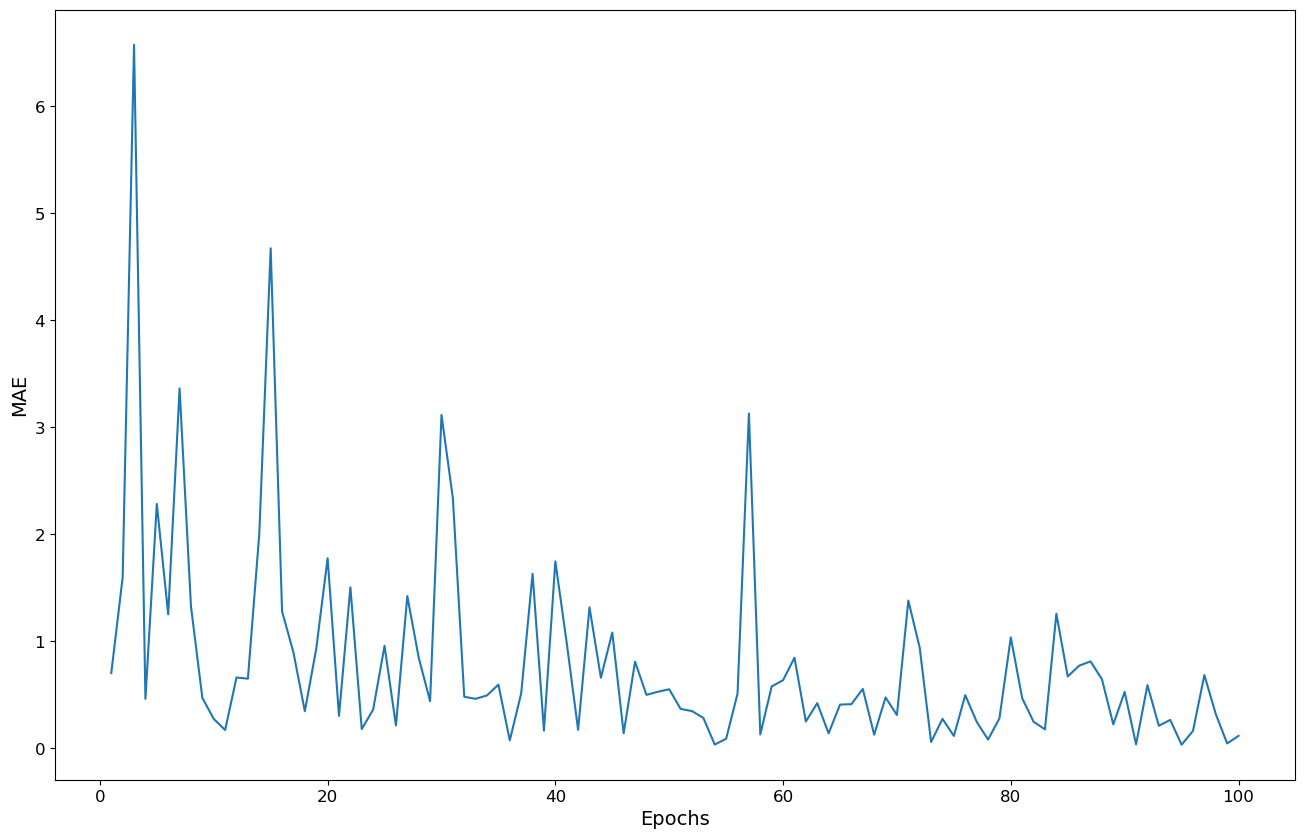

In [16]:
#Plotting the average mean absolute error
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

plt.figure(figsize=(16,10))
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('MAE', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [17]:
def normaliza(x_new):
    x_new[0][0] -= 221.3929
    x_new[0][1] -= 16.9675
    x_new[0][2] -= 193.2343
    x_new[0][3] -= 63.488
    x_new[0][4] -= 0.4840
    x_new[0][5] -= 3192.9

    x_new[0][0] /= 12.19024
    x_new[0][1] /= 2.048039
    x_new[0][2] /= 14.6197
    x_new[0][3] /= 3.098351
    x_new[0][4] /= 0.07179886
    x_new[0][5] /= 146.282
    
    return x_new

In [21]:
# Predictions

#Making predictions
#[Cyc Water, Mill Water , Mill Feed , PSI  , Cyc Pressure , Mill Power] -> % Solids

x_test = []
y_test = []

x_test.append(np.array([[230, 20, 200, 65, 0.55, 3300]]))
x_test.append(np.array([[230.7948,19.0728,199.5670,61.9917,0.4750,3096.6288]]))
x_test.append(np.array([[220.0886,15.3509,181.2426,64.7993,0.4114,3074.2701]]))
x_test.append(np.array([[9.7484,0.2655,0.2059,62.4160,0.0069,2507.2545]]))

for i in range(0,4):
    
    y_test.append(model.predict(normaliza(x_test[i])))
    print("X=%s\nY=%s \n" % (x_test[i][0], y_test[i][0]))

1/1 [==============================] - 0s 25ms/step
X=[0.70606485 1.48068469 0.46277967 0.48800152 0.91923465 0.7321475 ]
Y=[0.33530447] 

1/1 [==============================] - 0s 10ms/step
X=[ 0.77126455  1.02795894  0.4331621  -0.48293431 -0.12535018 -0.65812062]
Y=[0.3478333] 

1/1 [==============================] - 0s 9ms/step
X=[-0.10699543 -0.78934044 -0.82024255  0.42322513 -1.01115812 -0.81096717]
Y=[0.5178914] 

1/1 [==============================] - 0s 9ms/step
X=[-17.36179928  -8.15511814 -13.20330787  -0.3459905   -6.6449523
  -4.68714879]
Y=[6.124537] 

